In class programming:
1. In the code provided there are three mistake which stop the code to get run successfully;
find those mistakes and explain why they need to be corrected to be able to get the code run
2. Add embedding layer to the model, did you experience any improvement?

In [4]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import io
from google.colab import files

In [5]:
df = pd.read_csv('imdb_master.csv',encoding='latin-1')

In [6]:
df.head(5)

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [7]:
df.label.value_counts()

unsup    50000
pos      25000
neg      25000
Name: label, dtype: int64

In [8]:
sentences = df['review'].values
y = df['label'].values

In [9]:
#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

In [10]:
#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

In [11]:
len(sentences[0])

2000

In [12]:
#convert data to float and scale values between 0 and 1
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [13]:
model = Sequential()
model.add(layers.Dense(300,input_dim=2000, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 3s 46us/step - loss: 0.8803 - acc: 0.5051 - val_loss: 0.8408 - val_acc: 0.5164
Epoch 2/5
75000/75000 [==============================] - 2s 22us/step - loss: 0.7872 - acc: 0.5813 - val_loss: 0.8440 - val_acc: 0.5204
Epoch 3/5
75000/75000 [==============================] - 2s 23us/step - loss: 0.6819 - acc: 0.6809 - val_loss: 0.8696 - val_acc: 0.5138
Epoch 4/5
75000/75000 [==============================] - 2s 23us/step - loss: 0.4903 - acc: 0.8186 - val_loss: 0.9696 - val_acc: 0.5010
Epoch 5/5
75000/75000 [==============================] - 2s 24us/step - loss: 0.2855 - acc: 0.9273 - val_loss: 1.0668 - val_acc: 0.4941


In [14]:
[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

25000/25000 [==============================] - 1s 49us/step
Evaluation result on Test Data : Loss = 1.066784699382782, accuracy = 0.4940800070762634


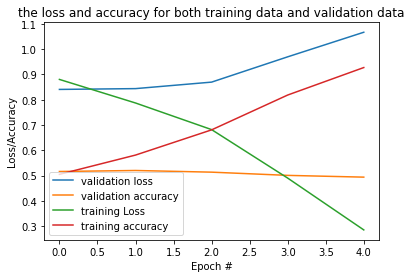

In [15]:
import matplotlib.pyplot as plt
import numpy as np

#plot the loss and accuracy for both training data and validation data. 
plt.figure()
plt.plot(np.arange(0, 5), history.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 5), history.history["val_acc"], label="validation accuracy")
plt.plot(np.arange(0, 5), history.history["loss"], label="training Loss")
plt.plot(np.arange(0, 5), history.history["acc"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [22]:
predict_classe = model.predict_classes(X_test[[10],:])
print(predict_classe[0])
print(y_test[10])

0
0


In [17]:
predict_classe = model.predict_classes(X_test[[5],:])
print(predict_classe[0])
print(y_test[5])

2
2


In [18]:
from keras.layers import Embedding, Flatten
#print(input_dim)
model2 = Sequential()
model2.add(Embedding(2000, 50, input_length=2000))
model2.add(Flatten())
model2.add(layers.Dense(300,input_dim=2000, activation='relu'))
model2.add(layers.Dense(3,activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

history2=model2.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

[test_loss, test_acc] = model2.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 12s 154us/step - loss: 0.9776 - acc: 0.4916 - val_loss: 0.8560 - val_acc: 0.5144
Epoch 2/5
75000/75000 [==============================] - 12s 154us/step - loss: 0.8347 - acc: 0.5275 - val_loss: 0.8389 - val_acc: 0.5151
Epoch 3/5
75000/75000 [==============================] - 12s 156us/step - loss: 0.8088 - acc: 0.5491 - val_loss: 0.8408 - val_acc: 0.5131
Epoch 4/5
75000/75000 [==============================] - 12s 157us/step - loss: 0.7882 - acc: 0.5703 - val_loss: 0.8444 - val_acc: 0.5189
Epoch 5/5
25000/25000 [==============================] - 2s 75us/step
Evaluation result on Test Data : Loss = 0.8588640796279907, accuracy = 0.516319990158081


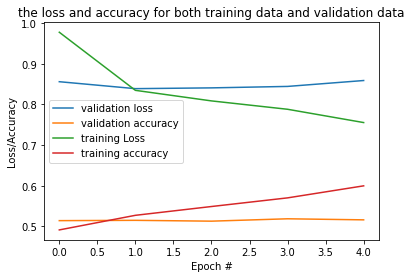

In [19]:
plt.figure()
plt.plot(np.arange(0, 5), history2.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 5), history2.history["val_acc"], label="validation accuracy")
plt.plot(np.arange(0, 5), history2.history["loss"], label="training Loss")
plt.plot(np.arange(0, 5), history2.history["acc"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [23]:
predict_classe2 = model2.predict_classes(X_test[[10],:])
print(predict_classe2[0])
print(y_test[10])

0
0
